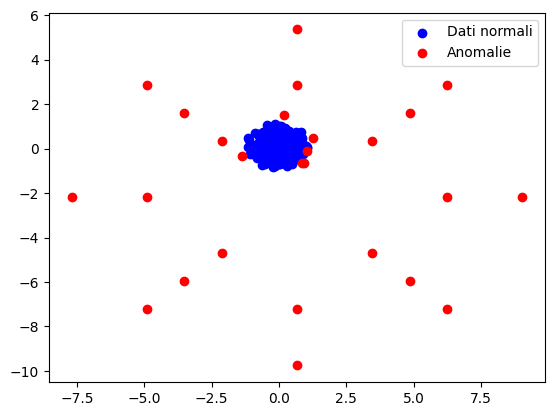

In [ ]:
# Import delle librerie necessarie
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler

# Generazione di un set di dati fittizi
# Utilizziamo la funzione make_blobs di scikit-learn per generare 300 osservazioni con 2 features
# e 3 centri di cluster. Il parametro random_state viene impostato per garantire risultati riproducibili.
data, y_true = make_blobs(n_samples=500, centers=1, n_features=2, cluster_std=1.5, random_state=42)

y_true[y_true == 0] = 1 #dove 0 metto 1 per uniformare a y_true


# Aggiunge 20 outlier manualmente
outliers = np.array([[10, 10], [10, -10], [-10, 10], [-10, -10], [15, 15], [15, -15], [-15, 15], [-15, -15], [20, 0], [-20, 0], [0, 20], [0, -20], [20, 20], [20, -20], [-20, 20], [-20, -20], [30, 0], [-30, 0], [0, 30], [0, -30]])
data = np.concatenate((data, outliers))
y_true = np.concatenate((y_true, np.full(len(outliers), -1)))



# Normalizzazione dei dati
# È buona pratica normalizzare i dati prima di utilizzare algoritmi basati su distanza.
scaler = StandardScaler()
data = scaler.fit_transform(data)

# Implementazione dell'algoritmo di Isolation Forest
# Creiamo un'istanza dell'algoritmo con 100 alberi e impostiamo il parametro di contaminazione al 5%.
iso_forest = IsolationForest(n_estimators=100, contamination=0.05, random_state=42)
iso_forest.fit(data)

# Identificazione delle anomalie
# Utilizziamo il metodo predict per identificare le anomalie nel set di dati.
# Le anomalie vengono etichettate con -1 e i punti normali con 1.
labels = iso_forest.predict(data)
# Visualizzazione dei risultati
# Creiamo un grafico a dispersione che mostri i dati e le anomalie evidenziate.
fig, ax = plt.subplots()

# Disegniamo i punti normali in blu e le anomalie in rosso.
ax.scatter(data[labels == 1, 0], data[labels == 1, 1], c="blue", label="Normal Data")
ax.scatter(data[labels == -1, 0], data[labels == -1, 1], c="red", label="Anomalies")

# Aggiungiamo una legenda e mostriamo il grafico.
ax.legend()
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score



# Compute confusion matrix
cm = confusion_matrix(y_true, labels)

# Compute performance metrics
precision = precision_score(y_true, labels)
recall = recall_score(y_true, labels)
f1 = f1_score(y_true, labels)
accuracy = accuracy_score(y_true, labels)

# Print confusion matrix and performance metrics
print("Confusion matrix:")
print(cm)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Accuracy:", accuracy)

Confusion matrix:
[[ 20   0]
 [  6 494]]
Precision: 1.0
Recall: 0.988
F1-score: 0.993963782696177
Accuracy: 0.9884615384615385


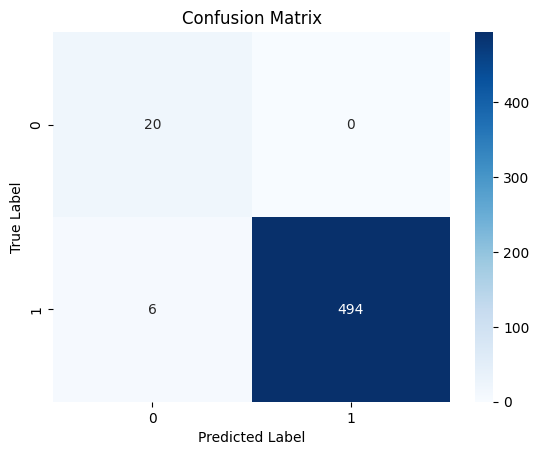

In [ ]:
import seaborn as sns

# Create heatmap of confusion matrix
sns.heatmap(cm, annot=True, cmap="Blues", fmt="g")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

AttributeError: ignored

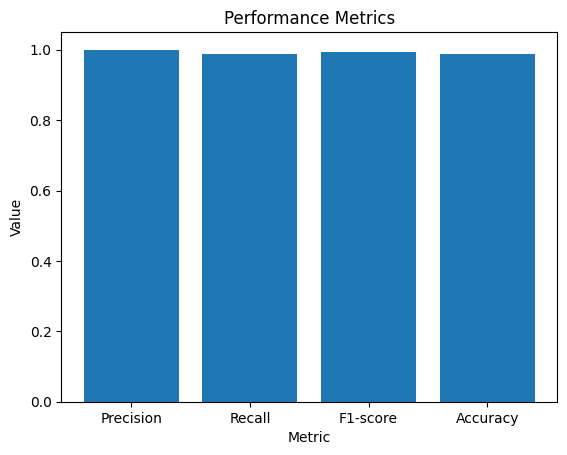

In [ ]:
# Compute performance metrics
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)
accuracy = accuracy_score(y_true, y_pred)


# Create bar plot of performance metrics
metrics = ["Precision", "Recall", "F1-score", "Accuracy"]
values = [precision, recall, f1, accuracy]
plt.bar(metrics, values)
plt.title("Performance Metrics")
plt.xlabel("Metric")
plt.ylabel("Value")
plt.set_ylim([0.8, 1.0])  # Set y-axis limits



plt.show()

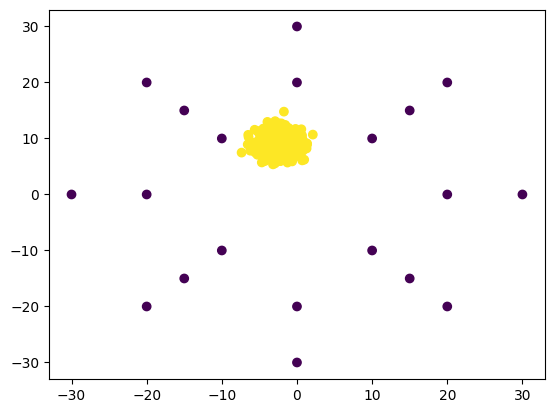

In [ ]:
import numpy as np
from sklearn.datasets import make_blobs

# Genera un dataset con 500 punti casuali, 2 feature e 1 cluster
X, y_true = make_blobs(n_samples=500, centers=1, n_features=2, cluster_std=1.5, random_state=42)

# Aggiunge 20 outlier manualmente
outliers = np.array([[10, 10], [10, -10], [-10, 10], [-10, -10], [15, 15], [15, -15], [-15, 15], [-15, -15], [20, 0], [-20, 0], [0, 20], [0, -20], [20, 20], [20, -20], [-20, 20], [-20, -20], [30, 0], [-30, 0], [0, 30], [0, -30]])
X = np.concatenate((X, outliers))
y_true = np.concatenate((y_true, np.full(len(outliers), -1)))

# Visualizza i dati e le ground truth labels
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y_true)
plt.show()